In [43]:
import pandas as pd
import numpy as np
from scipy.stats import randint as sp_randint

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 250

from rdkit import Chem
from rdkit.Chem import MolFromSmiles as MolFromSmiles
from rdkit.Chem.AllChem import EmbedMolecule, MMFFOptimizeMolecule
from rdkit.Chem import Descriptors

In [66]:
pyruvate = 'CC(=O)C(=O)O'
py_mol = MolFromSmiles(pyruvate)
py_logp = Descriptors.MolLogP(py_mol)
py_logp

-0.34000000000000014

In [71]:
pyruvate.count('C')

3

In [4]:
rxns=pd.read_csv("Alpha_Keto_Output.csv")
rxns

,Index,Reactant_1_SMILES,Reactant_1_Name,Reactant_1_Monoisotopic_Mass,Reactant_2_SMILES,Reactant_2_Name,Reactant_2_Monoisotopic_Mass,Intermediates,Intermediates_Monoisotopic_Mass,Final_Product,CO2_Fall_Off_Intermediate,CO2_Fall_Off_Intermediate_Monoisotopic_Mass
0,0,CSCCC(=O)C(=O)O,Alpha-keto-gamma-(methylthio)butyrate acid sod...,148.0194,CSCCC(=O)C(=O)O,Alpha-keto-gamma-(methylthio)butyrate acid sod...,148.0194,CSCCC(=O)C(O)(CCSC)C(=O)O,252.0490,CSCCCCCCSC,CSCCC(=O)C(O)CCSC,208.0592
1,1,CSCCC(=O)C(=O)O,Alpha-keto-gamma-(methylthio)butyrate acid sod...,148.0194,O=C(O)C(=O)Cc1ccc(O)cc1,4-hydroxyphenylpyruvic acid,180.0423,CSCCC(=O)C(O)(Cc1ccc(O)cc1)C(=O)O;CSCCC(O)(C(=...,284.0718,CSCCCCCc1ccc(O)cc1,CSCCC(O)C(=O)Cc1ccc(O)cc1;CSCCC(=O)C(O)Cc1ccc(...,240.0820
2,2,CSCCC(=O)C(=O)O,Alpha-keto-gamma-(methylthio)butyrate acid sod...,148.0194,CCCCCCC(=O)C(=O)O,2-oxooctanoic acid,158.0943,CCCCCCC(O)(C(=O)O)C(=O)CCSC;CCCCCCC(=O)C(O)(CC...,262.1239,CCCCCCCCCCSC,CCCCCCC(=O)C(O)CCSC;CCCCCCC(O)C(=O)CCSC,218.1341
3,3,CSCCC(=O)C(=O)O,Alpha-keto-gamma-(methylthio)butyrate acid sod...,148.0194,O=C(O)C(=O)Cc1cnc[nH]1,Imidazolepyruvic acid hydrobromide hydrate,154.0378,CSCCC(=O)C(O)(Cc1cnc[nH]1)C(=O)O;CSCCC(O)(C(=O...,258.0674,CSCCCCCc1cnc[nH]1,CSCCC(O)C(=O)Cc1cnc[nH]1;CSCCC(=O)C(O)Cc1cnc[nH]1,214.0776
4,4,CSCCC(=O)C(=O)O,Alpha-keto-gamma-(methylthio)butyrate acid sod...,148.0194,O=C(O)CCCC(=O)C(=O)O,2-oxoadipic acid,160.0372,CSCCC(=O)C(O)(CCCC(=O)O)C(=O)O;CSCCC(O)(C(=O)O...,264.0668,CSCCCCCCCC(=O)O,CSCCC(=O)C(O)CCCC(=O)O;CSCCC(O)C(=O)CCCC(=O)O,220.0769
...,...,...,...,...,...,...,...,...,...,...,...,...
460,460,CCOC(=O)c1csc(n1)C(C#N)C(=O)C(O)=O,"3-cyano-3-[4-(ethoxycarbonyl)-1,3-thiazol-2-yl...",268.0154,OC(=O)C(=O)NC1(CCCCC1)c1ccc(Cl)s1,{[1-(5-chlorothiophen-2-yl)cyclohexyl]carbamoy...,287.0383,CCOC(=O)c1csc(C(C#N)C(=O)C(O)(NC2(c3ccc(Cl)s3)...,511.0639,CCOC(=O)c1csc(C(C#N)CCNC2(c3ccc(Cl)s3)CCCCC2)n1,CCOC(=O)c1csc(C(C#N)C(=O)C(O)NC2(c3ccc(Cl)s3)C...,467.0740
461,461,CCOC(=O)c1csc(n1)C(C#N)C(=O)C(O)=O,"3-cyano-3-[4-(ethoxycarbonyl)-1,3-thiazol-2-yl...",268.0154,OC(=O)C(=O)Nc1sc2CCCCc2c1C(O)=O,"2-(carboxyformamido)-4,5,6,7-tetrahydro-1-benz...",269.0358,CCOC(=O)c1csc(C(C#N)C(=O)C(O)(Nc2sc3c(c2C(=O)O...,493.0614,CCOC(=O)c1csc(C(C#N)CCNc2sc3c(c2C(=O)O)CCCC3)n1,CCOC(=O)c1csc(C(C#N)C(=O)C(O)Nc2sc3c(c2C(=O)O)...,449.0715
462,462,OC(=O)C(=O)NC1(CCCCC1)c1ccc(Cl)s1,{[1-(5-chlorothiophen-2-yl)cyclohexyl]carbamoy...,287.0383,OC(=O)C(=O)NC1(CCCCC1)c1ccc(Cl)s1,{[1-(5-chlorothiophen-2-yl)cyclohexyl]carbamoy...,287.0383,O=C(O)C(O)(NC1(c2ccc(Cl)s2)CCCCC1)C(=O)NC1(c2c...,530.0868,Clc1ccc(C2(NCCNC3(c4ccc(Cl)s4)CCCCC3)CCCCC2)s1,O=C(NC1(c2ccc(Cl)s2)CCCCC1)C(O)NC1(c2ccc(Cl)s2...,486.0969
463,463,OC(=O)C(=O)NC1(CCCCC1)c1ccc(Cl)s1,{[1-(5-chlorothiophen-2-yl)cyclohexyl]carbamoy...,287.0383,OC(=O)C(=O)Nc1sc2CCCCc2c1C(O)=O,"2-(carboxyformamido)-4,5,6,7-tetrahydro-1-benz...",269.0358,O=C(O)c1c(NC(=O)C(O)(NC2(c3ccc(Cl)s3)CCCCC2)C(...,512.0843,O=C(O)c1c(NCCNC2(c3ccc(Cl)s3)CCCCC2)sc2c1CCCC2,O=C(O)c1c(NC(O)C(=O)NC2(c3ccc(Cl)s3)CCCCC2)sc2...,468.0944


In [14]:
product_smiles = rxns.loc[:,'Intermediates'].append(rxns.loc[:,'CO2_Fall_Off_Intermediate'],ignore_index=True)
product_smiles

0                              CSCCC(=O)C(O)(CCSC)C(=O)O
1      CSCCC(=O)C(O)(Cc1ccc(O)cc1)C(=O)O;CSCCC(O)(C(=...
2      CCCCCCC(O)(C(=O)O)C(=O)CCSC;CCCCCCC(=O)C(O)(CC...
3      CSCCC(=O)C(O)(Cc1cnc[nH]1)C(=O)O;CSCCC(O)(C(=O...
4      CSCCC(=O)C(O)(CCCC(=O)O)C(=O)O;CSCCC(O)(C(=O)O...
                             ...                        
925    CCOC(=O)c1csc(C(C#N)C(=O)C(O)NC2(c3ccc(Cl)s3)C...
926    CCOC(=O)c1csc(C(C#N)C(=O)C(O)Nc2sc3c(c2C(=O)O)...
927    O=C(NC1(c2ccc(Cl)s2)CCCCC1)C(O)NC1(c2ccc(Cl)s2...
928    O=C(O)c1c(NC(O)C(=O)NC2(c3ccc(Cl)s3)CCCCC2)sc2...
929    O=C(O)c1c(NC(=O)C(O)Nc2sc3c(c2C(=O)O)CCCC3)sc2...
Length: 930, dtype: object

In [23]:
product_smiles[1].split(';')

['CSCCC(=O)C(O)(Cc1ccc(O)cc1)C(=O)O', 'CSCCC(O)(C(=O)O)C(=O)Cc1ccc(O)cc1']

In [84]:
smi='CSCCC(=O)C(O)(Cc1ccc(O)cc1)C(=O)O'
smi.count('c')+smi.count('C')

13

In [28]:
logP=[]
for smile in product_smiles:
    smiles = smile.split(';')
    smile = smiles[0]
    m = MolFromSmiles(smile)
    p = Descriptors.MolLogP(m)
    logP.append(p)

In [29]:
logP

[0.8774,
 1.0726,
 2.0946999999999996,
 0.09009999999999985,
 0.3792000000000001,
 1.1703999999999997,
 0.6865999999999999,
 2.36336,
 1.1703999999999997,
 0.5343,
 0.5191999999999998,
 1.3669999999999998,
 0.9243999999999998,
 1.1704,
 -0.010900000000000187,
 0.1442000000000001,
 1.1594,
 -1.1324000000000005,
 1.2810000000000001,
 1.9193999999999998,
 -0.4010000000000005,
 -0.8834000000000002,
 0.05409999999999976,
 1.5596000000000008,
 1.8186,
 1.9152,
 0.18139999999999956,
 1.0648799999999998,
 3.2459000000000024,
 1.8323999999999998,
 1.2678,
 2.2899000000000003,
 0.28530000000000016,
 0.5743999999999998,
 1.3656,
 0.8817999999999999,
 2.40146,
 1.3656,
 0.7295,
 0.7143999999999999,
 1.5622000000000003,
 1.1196,
 1.3656,
 0.1842999999999999,
 0.3394,
 1.3545999999999994,
 -0.9372000000000005,
 1.4761999999999995,
 2.1146,
 -0.20580000000000037,
 -0.6882000000000001,
 0.24930000000000013,
 1.9118999999999995,
 2.0138,
 2.1104000000000003,
 0.37659999999999927,
 1.2600799999999999,
 

In [50]:
np.arange(0,1,0.5)

array([0. , 0.5])

Text(0, 0.5, 'Number of Molecules')

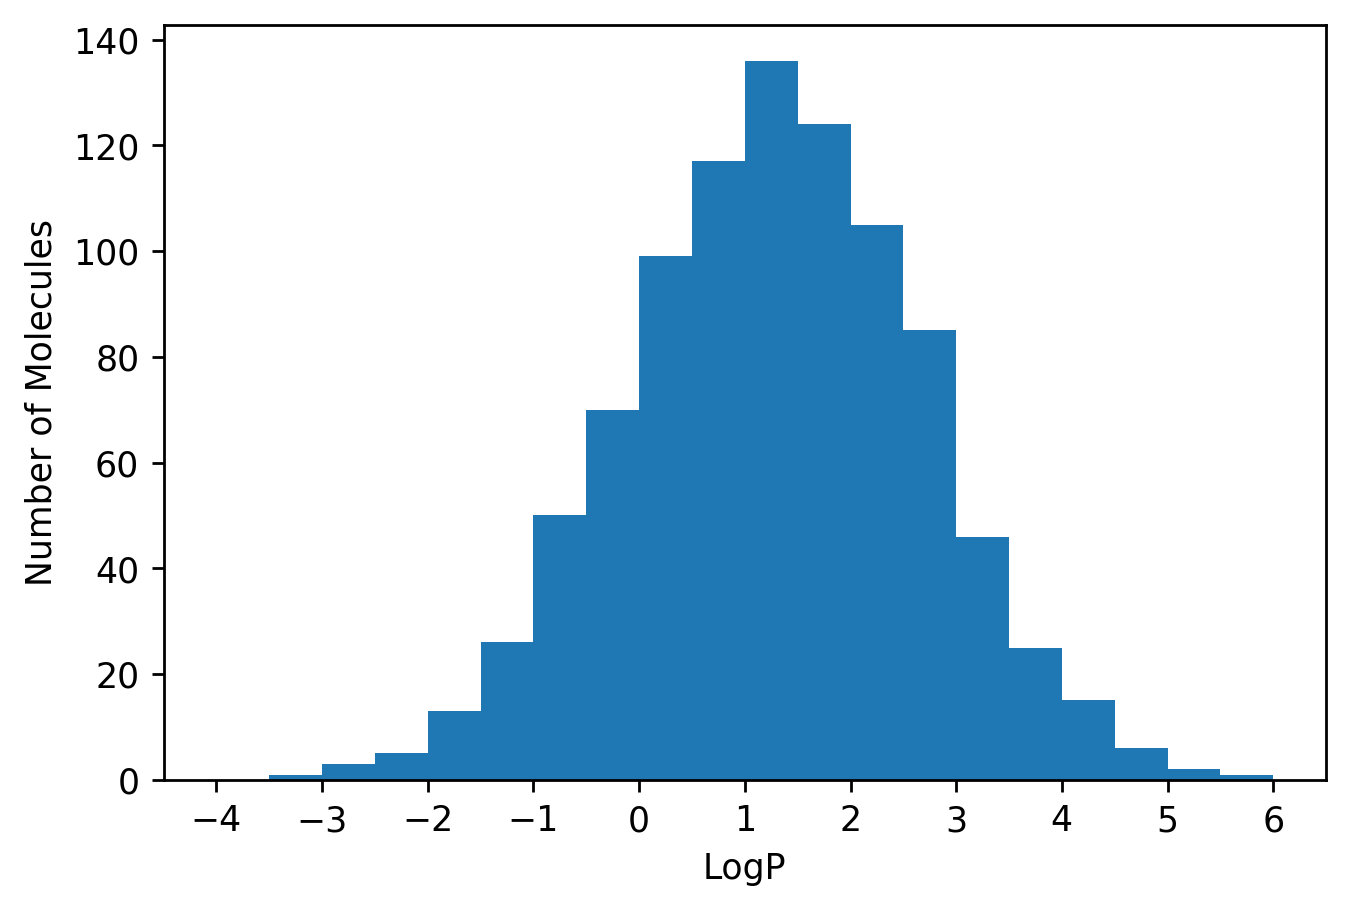

In [53]:
plt.hist(logP,bins=np.arange(-4,6.5,0.5))
plt.xlabel('LogP')
plt.xticks(np.arange(-4,6.5,1))
plt.ylabel('Number of Molecules')

In [75]:
large_logP=[]
small_logP=[]
for smile in product_smiles:
    smiles = smile.split(';')
    smile = smiles[0]
    num_c = smile.count('c')+smile.count('C')
    m = MolFromSmiles(smile)
    p = Descriptors.MolLogP(m)
    if num_c<=7:
        small_logP.append(p)
    else:
        large_logP.append(p)   

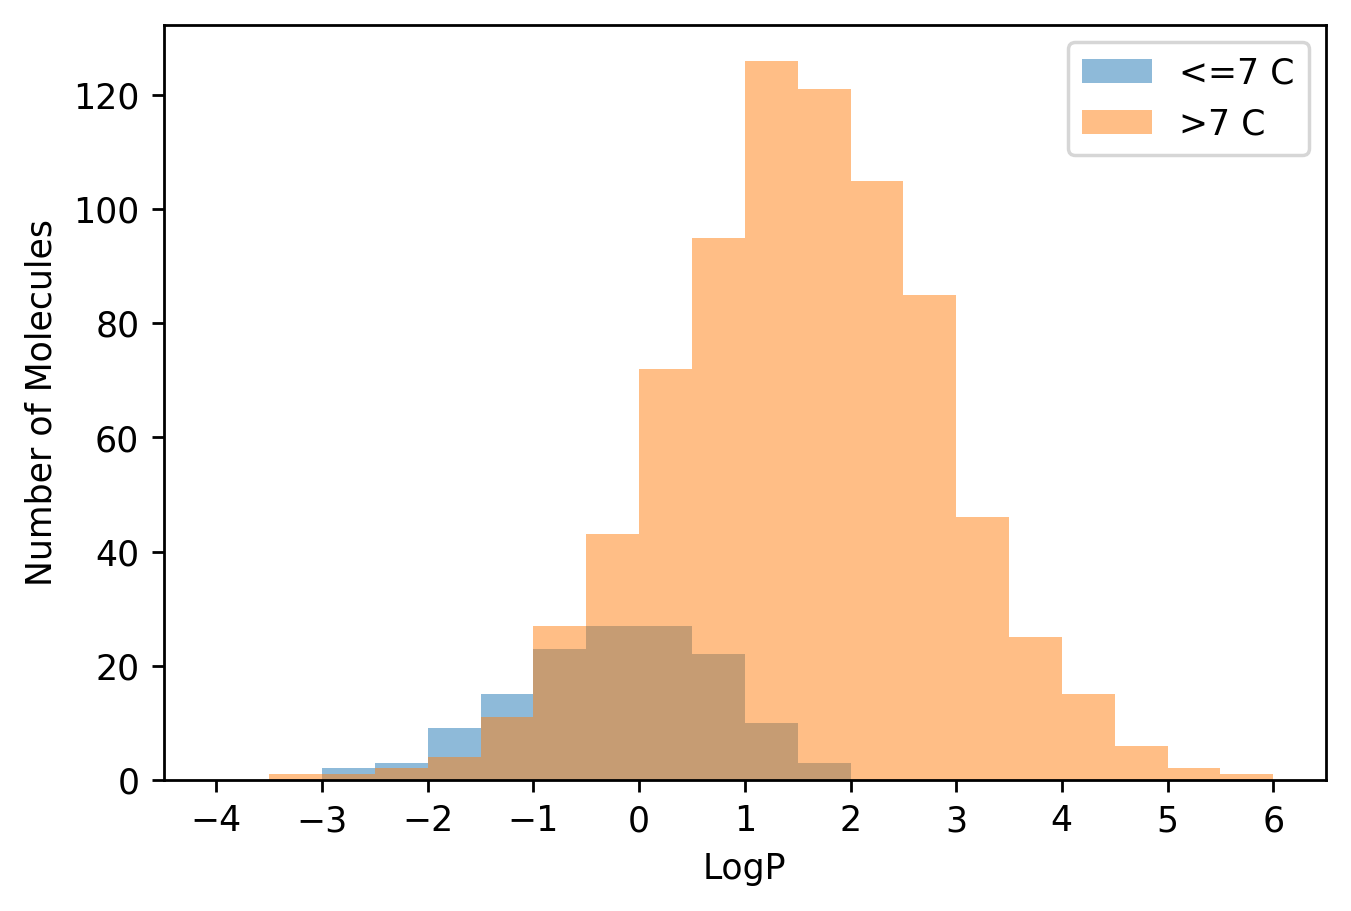

In [81]:
plt.hist(small_logP,bins=np.arange(-4,6.5,0.5), alpha=0.5, label='<=7 C')
plt.hist(large_logP,bins=np.arange(-4,6.5,0.5), alpha =0.5, label='>7 C')
plt.xlabel('LogP')
plt.xticks(np.arange(-4,6.5,1))
plt.ylabel('Number of Molecules')
plt.legend(loc='upper right')

In [82]:
count = len([i for i in large_logP if i < 0.5]) 
count

161

In [83]:
print("Percent less than 0.5 is "+str(100*count/len(large_logP))+' %')

Percent less than 0.5 is 20.40557667934094 %
